In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify as mc

In [2]:
# Import data
MDcounties = gpd.read_file("https://geodata.md.gov/imap/rest/services/Boundaries/MD_PhysicalBoundaries/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
    
UScases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

MDcountypop = pd.read_csv("https://github.com/awbecker25/covidviz/blob/master/MDcountypop2018.csv")

# View cases dataset
UScases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,141,141,145,145,145,145,145,145,149,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,57,57,66,66,66,66,66,66,66,66


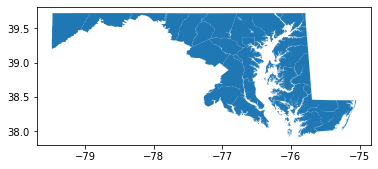

In [3]:
# View MD county geometries
MDcounties.plot()

In [4]:
# Restrict to MD cases and variables of interest
MDcases = UScases[(UScases.Province_State == "Maryland")].drop(columns = ["UID", "iso2", "iso3", "code3",
                                                                          "Province_State", "Combined_Key",
                                                                          "Admin2", "Country_Region", "Lat",
                                                                          "Long_"])
MDcases.head()

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
1198,24001.0,0,0,0,0,0,0,0,0,0,...,115,116,118,118,121,124,126,129,129,143
1199,24003.0,0,0,0,0,0,0,0,0,0,...,1571,1662,1725,1807,1885,1959,2018,2045,2085,2194
1200,24005.0,0,0,0,0,0,0,0,0,0,...,2631,2740,2831,3013,3183,3301,3448,3430,3527,3662
1201,24009.0,0,0,0,0,0,0,0,0,0,...,139,142,150,161,160,162,171,174,184,188
1202,24011.0,0,0,0,0,0,0,0,0,0,...,69,69,71,74,79,95,98,99,101,105


In [5]:
# Merge cases and 2018 ACS total population estimates
MDcases["FIPS"] = MDcases.FIPS.astype(int)

popmerged = pd.merge(MDcases, MDcountypop, on = "FIPS").drop(columns = ["FIPS", "STATE"]).rename(columns = {"NAME" : "COUNTY"})

popmerged["COUNTY"] = popmerged["COUNTY"].str.strip()

popmerged.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,COUNTY,2018POP
0,0,0,0,0,0,0,0,0,0,0,...,118,118,121,124,126,129,129,143,Allegany,71977
1,0,0,0,0,0,0,0,0,0,0,...,1725,1807,1885,1959,2018,2045,2085,2194,Anne Arundel,567696
2,0,0,0,0,0,0,0,0,0,0,...,2831,3013,3183,3301,3448,3430,3527,3662,Baltimore,827625
3,0,0,0,0,0,0,0,0,0,0,...,150,161,160,162,171,174,184,188,Calvert,91082
4,0,0,0,0,0,0,0,0,0,0,...,71,74,79,95,98,99,101,105,Caroline,32875


In [6]:
# Calculate IR
popmerged["ir"] = (popmerged["5/7/20"] / popmerged["2018POP"]) * 100000

popmerged.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,COUNTY,2018POP,ir
0,0,0,0,0,0,0,0,0,0,0,...,118,121,124,126,129,129,143,Allegany,71977,198.674577
1,0,0,0,0,0,0,0,0,0,0,...,1807,1885,1959,2018,2045,2085,2194,Anne Arundel,567696,386.474451
2,0,0,0,0,0,0,0,0,0,0,...,3013,3183,3301,3448,3430,3527,3662,Baltimore,827625,442.470926
3,0,0,0,0,0,0,0,0,0,0,...,161,160,162,171,174,184,188,Calvert,91082,206.407413
4,0,0,0,0,0,0,0,0,0,0,...,74,79,95,98,99,101,105,Caroline,32875,319.391635


In [7]:
# Join tabular data to MD county geometries
MDcounties["COUNTY"] = MDcounties["COUNTY"].str.strip()

map_df = pd.merge(MDcounties, popmerged, on = "COUNTY")

map_df = gpd.GeoDataFrame(map_df)

map_df.head()

,OBJECTID,COUNTY,DISTRICT,COUNTY_FIP,COUNTYNUM,CREATION_D,LAST_UPDAT,geometry,1/22/20,1/23/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,2018POP,ir
0,1,Allegany,6.0,1,1,1264636800000,1264636800000,"MULTIPOLYGON (((-78.34284 39.72224, -78.34303 ...",0,0,...,118,118,121,124,126,129,129,143,71977,198.674577
1,2,Anne Arundel,5.0,3,2,1145318400000,1145318400000,"MULTIPOLYGON (((-76.60600 39.22913, -76.60503 ...",0,0,...,1725,1807,1885,1959,2018,2045,2085,2194,567696,386.474451
2,3,Baltimore,4.0,5,3,1160352000000,1160352000000,"MULTIPOLYGON (((-76.56796 39.68592, -76.56795 ...",0,0,...,2831,3013,3183,3301,3448,3430,3527,3662,827625,442.470926
3,4,Baltimore City,0.0,510,24,1145318400000,1258329600000,"MULTIPOLYGON (((-76.52967 39.37196, -76.52975 ...",0,0,...,2068,2162,2237,2319,2411,2609,2752,2856,614700,464.616886
4,5,Calvert,5.0,9,4,1264636800000,1264636800000,"MULTIPOLYGON (((-76.64212 38.76921, -76.64191 ...",0,0,...,150,161,160,162,171,174,184,188,91082,206.407413


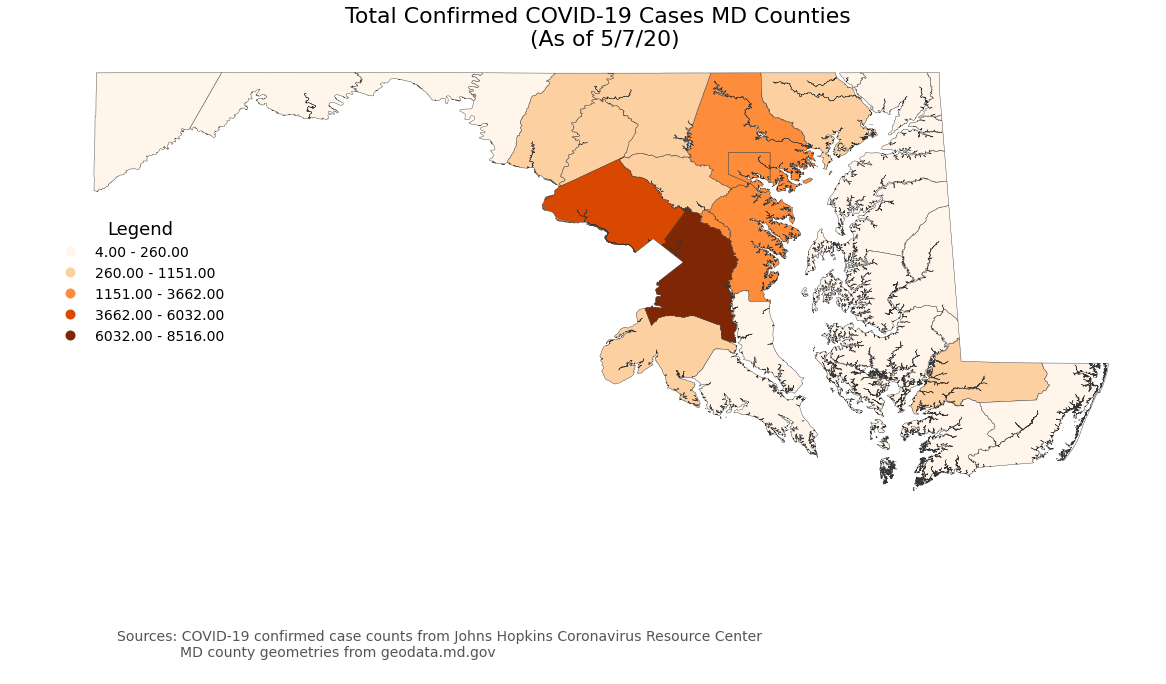

In [8]:
## Plot raw total cases

# plot map
map_df.plot(column = "5/7/20",
            cmap = "Oranges",
            figsize = (20, 12),
            linewidth = 0.4,
            edgecolor = "0.2",
            legend = True,
            scheme = "naturalbreaks",
            legend_kwds = {"loc" : "center left",
                           "frameon" : False,
                           "title" : "Legend",
                           "title_fontsize" : 18,
                           "fontsize" : 14})

# remove axis
plt.axis("off")

# add title
plt.title("Total Confirmed COVID-19 Cases MD Counties \n (As of 5/7/20)",
          loc = "Center",
          fontdict = {'fontsize' : 22})

# add annotation
plt.annotate("Sources: COVID-19 confirmed case counts from Johns Hopkins Coronavirus Resource Center \n              MD county geometries from geodata.md.gov",
             xy = (0.1, .08),
             xycoords = "figure fraction",
             horizontalalignment = "left",
             verticalalignment = "top",
             fontsize = 14,
             color = "#555555")

# export map image
plt.savefig("totalcasemap.png",
            dpi=300)

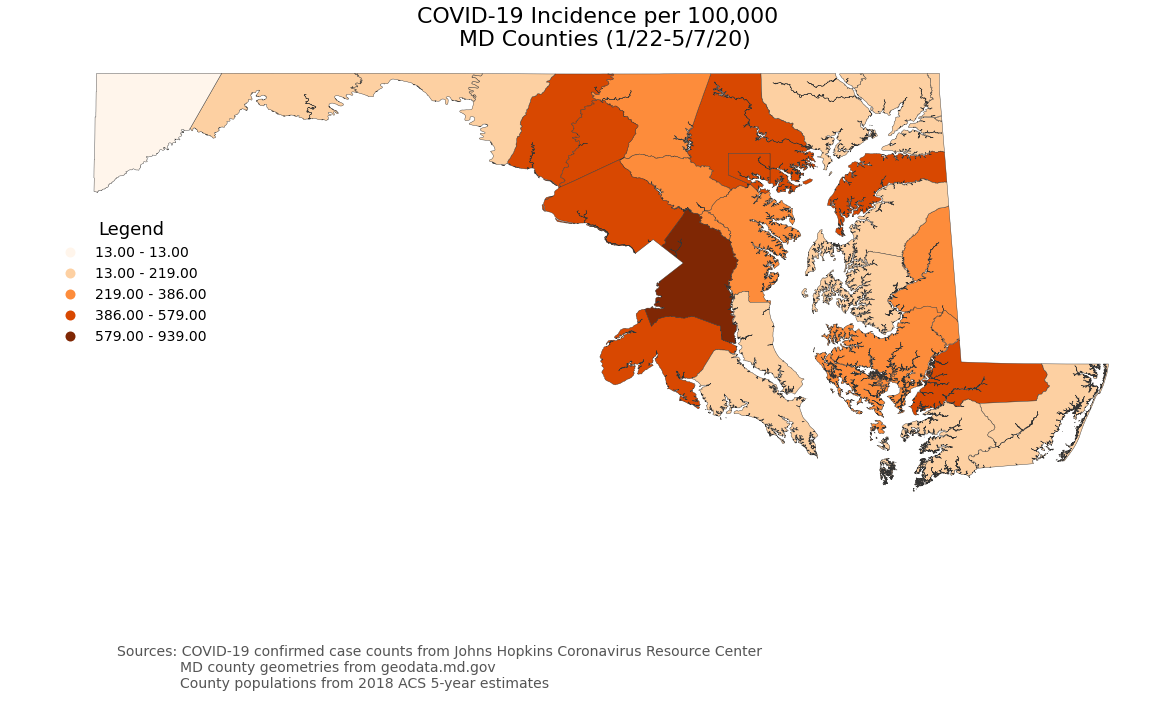

In [9]:
## Plot incidence rate per 100,000 (IR calculated using 2018 ACS pop estimates)

# round IR to integer
map_df["ir_round"] = map_df["ir"].astype(int)

# plot map
map_df.plot(column = "ir_round",
            cmap = "Oranges",
            figsize = (20, 12),
            linewidth = 0.4,
            edgecolor = "0.2",
            legend = True,
            scheme = "naturalbreaks",
            legend_kwds = {"loc" : "center left",
                           "frameon" : False,
                           "title" : "Legend",
                           "title_fontsize" : 18,
                           "fontsize" : 14})

# remove axis
plt.axis("off")

# add title
plt.title("COVID-19 Incidence per 100,000 \n MD Counties (1/22-5/7/20)",
          loc = "Center",
          fontdict = {"fontsize" : 22})

# add annotation
plt.annotate("Sources: COVID-19 confirmed case counts from Johns Hopkins Coronavirus Resource Center \n              MD county geometries from geodata.md.gov \n              County populations from 2018 ACS 5-year estimates",
             xy = (0.1, .08),
             xycoords = "figure fraction",
             horizontalalignment = "left",
             verticalalignment = "top",
             fontsize = 14,
             color = "#555555")

# export map image
plt.savefig("ratemap.png",
            dpi = 300)